In [32]:
import pandas as pd

DATADIR = '../../../data/train/train_ratings.csv'

data = pd.read_csv(DATADIR)
data.sample(5)

,user,item,time
5062138,135974,5956,1128555805
3539076,94377,56788,1212760625
4882941,130987,78729,1281260127
4815973,129225,377,1262266446
3345968,89046,543,1225602526


사용자별로 여러번 본 영화는 없음

In [33]:
a = data.groupby('user')['item'].value_counts().values
set(a)

{1}

평균 영화를 시청한 횟수

In [34]:
data.groupby('user')['item'].count().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64

In [35]:
from datetime import datetime as dt

연도별 시청 횟수

In [36]:
year = data.iloc[:, 2].apply(lambda x: dt.fromtimestamp(x).year)
year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
5154466    2009
5154467    2009
5154468    2009
5154469    2009
5154470    2009
Name: time, Length: 5154471, dtype: int64

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme(color_codes = True)

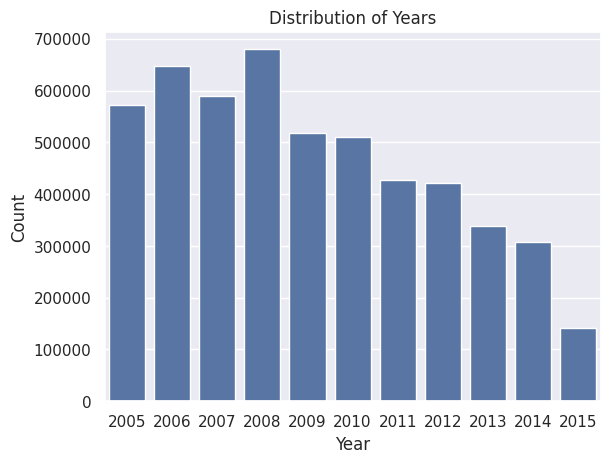

In [38]:
sns.countplot(x=year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')
plt.show()


월별 시청 횟수

In [39]:
month = data.iloc[:, 2].apply(lambda x: dt.fromtimestamp(x).month)
month

0           1
1           1
2           1
3           1
4           1
           ..
5154466    12
5154467    12
5154468    12
5154469    12
5154470    12
Name: time, Length: 5154471, dtype: int64

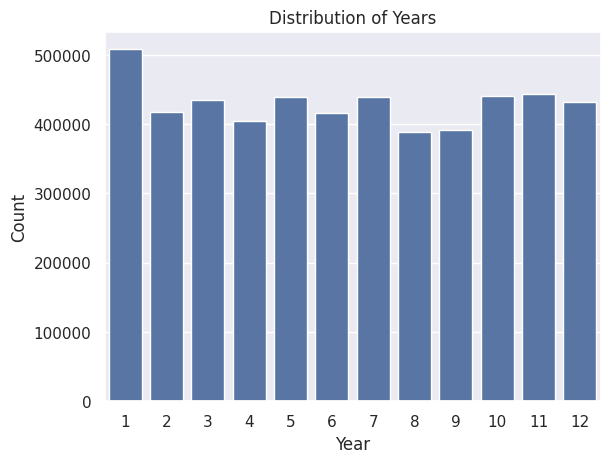

In [40]:
sns.countplot(x=month)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')
plt.show()

In [52]:
# Create a new column 'YearMonth' by combining 'year' and 'month'
data['year'] = year.astype(str) 
data['month'] = month.astype(str)
data['YearMonth'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)
data.sample(5)

,user,item,time,year,month,YearMonth
1011592,26640,1625,1183491254,2007,7,2007-07
2110946,55983,3083,1278802693,2010,7,2010-07
3557297,94964,4447,1360062709,2013,2,2013-02
4660052,124831,52435,1256910801,2009,10,2009-10
1429360,37726,3751,1277818484,2010,6,2010-06


In [54]:
# data['YearMonth'] = pd.to_datetime(data['YearMonth'], format='%Y-%m')
data_sorted = data.sort_values('YearMonth')
data_sorted

,user,item,time,year,month,YearMonth
4453149,119055,6232,1113806509,2005,4,2005-04
3956624,105575,1748,1114082077,2005,4,2005-04
3956625,105575,1333,1114082097,2005,4,2005-04
3956626,105575,2455,1114082116,2005,4,2005-04
3956627,105575,1281,1114082825,2005,4,2005-04
...,...,...,...,...,...,...
4931357,132073,111362,1426719158,2015,3,2015-03
4931356,132073,86882,1426719150,2015,3,2015-03
4931355,132073,1265,1426719138,2015,3,2015-03
4931369,132073,51931,1426767747,2015,3,2015-03


In [55]:
data_count = data_sorted.groupby('YearMonth').size().reset_index(name='Count')
data_count

,YearMonth,Count
0,2005-04,51465
1,2005-05,84850
2,2005-06,78334
3,2005-07,67531
4,2005-08,55710
...,...,...
115,2014-11,42517
116,2014-12,43037
117,2015-01,54156
118,2015-02,43920


/tmp/ipykernel_390137/545335730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearMonth', y='Count', data=data_count, palette="viridis")


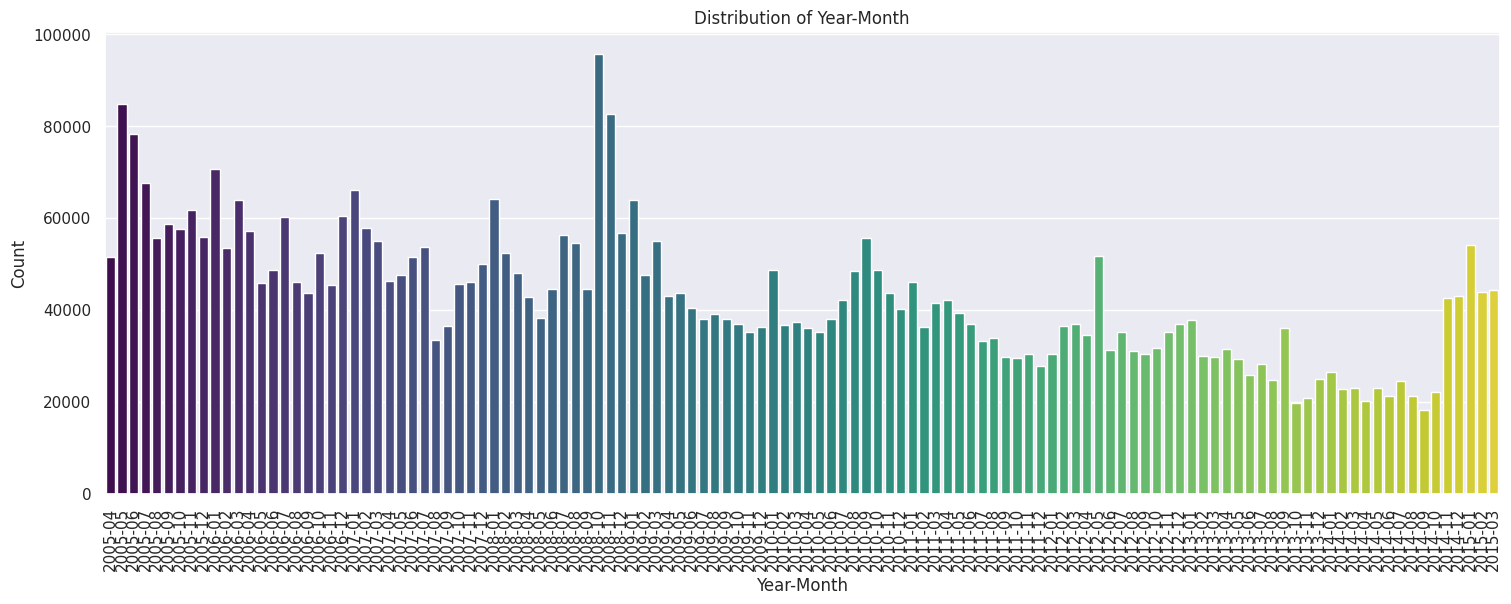

In [56]:
# Visualize the distribution of YearMonth
plt.figure(figsize=(18, 6))  # Adjust the figure size as per your preference
sns.barplot(x='YearMonth', y='Count', data=data_count, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Distribution of Year-Month')
plt.show()
